In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [3]:
start = '2019-07'
end = '2020-07-01'

df = data.DataReader('7203.JP', 'stooq', start, end)

In [4]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-01,1352.0,1355.0,1328.6,1331.2,25141000
2020-06-30,1374.0,1375.6,1350.0,1352.4,23943500
2020-06-29,1356.0,1361.4,1347.4,1351.8,25504000
2020-06-26,1364.6,1380.8,1364.2,1373.6,23512000
2020-06-25,1375.4,1377.6,1358.6,1359.0,29914500
2020-06-24,1379.2,1402.4,1379.0,1395.4,26051000
2020-06-23,1376.4,1393.8,1365.4,1379.2,25700000
2020-06-22,1359.8,1374.0,1356.0,1363.6,14133000
2020-06-19,1381.6,1382.4,1365.0,1370.2,29101500


In [26]:
date = df.index # X軸に日付を指定
close = df['Close'] # Y軸に株価を指定

In [11]:
span01 = 5
span02 = 25
span03 = 50

df['SMA01'] = price.rolling(window=span01).mean()
df['SMA02'] = price.rolling(window=span02).mean()
df['SMA03'] = price.rolling(window=span03).mean()

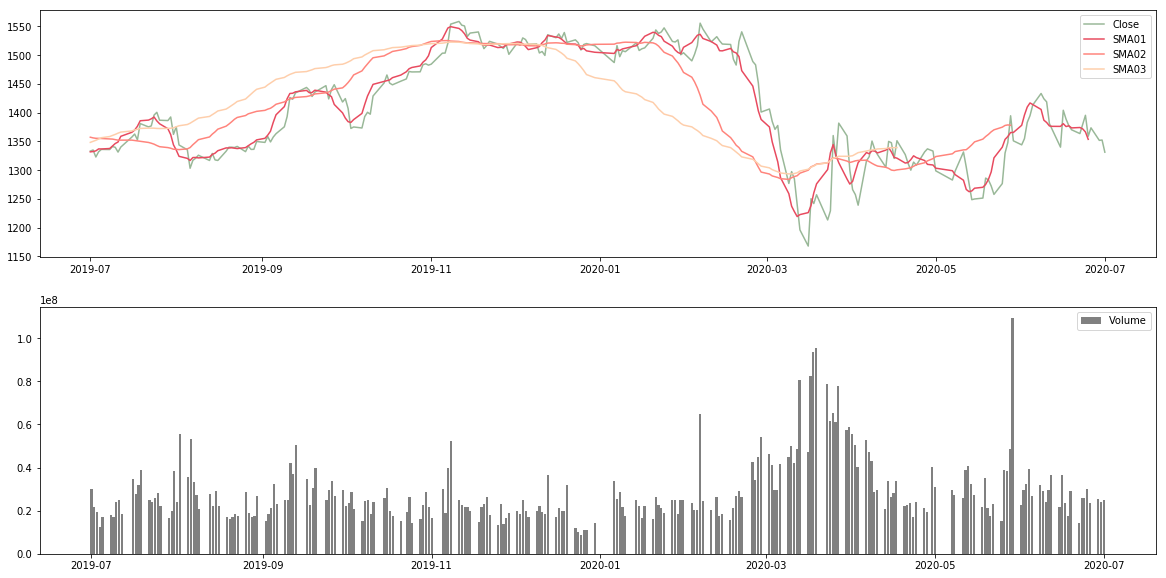

In [27]:
plt.figure(figsize=(20, 10)) # グラフのサイズを指定

plt.subplot(2, 1, 1)  # 2行1列のグラフの1番目のグラフを表示
plt.plot(date, close, label='Close', color='#99b898')  # X軸に日付、Y軸に株価、Closeを表示
plt.plot(date, df['SMA01'], label='SMA01', color='#e84a5f')  # X軸に日付、Y軸に移動平均線、SMA01を表示
plt.plot(date, df['SMA02'], label='SMA02', color='#ff847c')  # X軸に日付、Y軸に移動平均線、SMA02を表示
plt.plot(date, df['SMA03'], label='SMA03', color='#feceab')  # X軸に日付、Y軸に移動平均線、SMA03を表示
plt.legend()
    
plt.subplot(2, 1, 2)  # 2行1列のグラフの2番目のグラフを表示
plt.bar(date, df['Volume'], label='Volume', color='gray') # X軸に日付、Y軸に出来高、Volumeを表示
plt.legend()  # 凡例を表示

In [28]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [29]:
df.head()

,Open,High,Low,Close,Volume,SMA01,SMA02,SMA03,macd,macdsignal,macdhist
Date,,,,,,,,,,,
2020-07-01,1352.0,1355.0,1328.6,1331.2,25141000,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,1374.0,1375.6,1350.0,1352.4,23943500,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29,1356.0,1361.4,1347.4,1351.8,25504000,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-26,1364.6,1380.8,1364.2,1373.6,23512000,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-25,1375.4,1377.6,1358.6,1359.0,29914500,1353.6,NaN,NaN,NaN,NaN,NaN


In [36]:
df.tail()

,Open,High,Low,Close,Volume,SMA01,SMA02,SMA03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,
2019-07-05,1335.65,1341.67,1332.55,1336.04,17228675,1336.818,1355.0548,1356.3934,-5.904359,-2.116992,-3.787367,43.719010
2019-07-04,1331.00,1335.27,1327.12,1331.97,12432305,1336.934,1355.2952,1354.1554,-6.766413,-3.046876,-3.719537,43.002894
2019-07-03,1323.44,1330.61,1318.20,1322.85,19411330,1333.558,1355.3804,1351.9250,-8.092223,-4.055946,-4.036278,41.419295
2019-07-02,1330.22,1337.01,1324.60,1335.07,21683695,1332.356,1356.1020,1350.1602,-8.063929,-4.857542,-3.206387,44.283076
2019-07-01,1311.99,1333.13,1304.62,1333.13,30141025,1331.812,1357.2964,1348.2944,-8.104623,-5.506958,-2.597664,43.927947


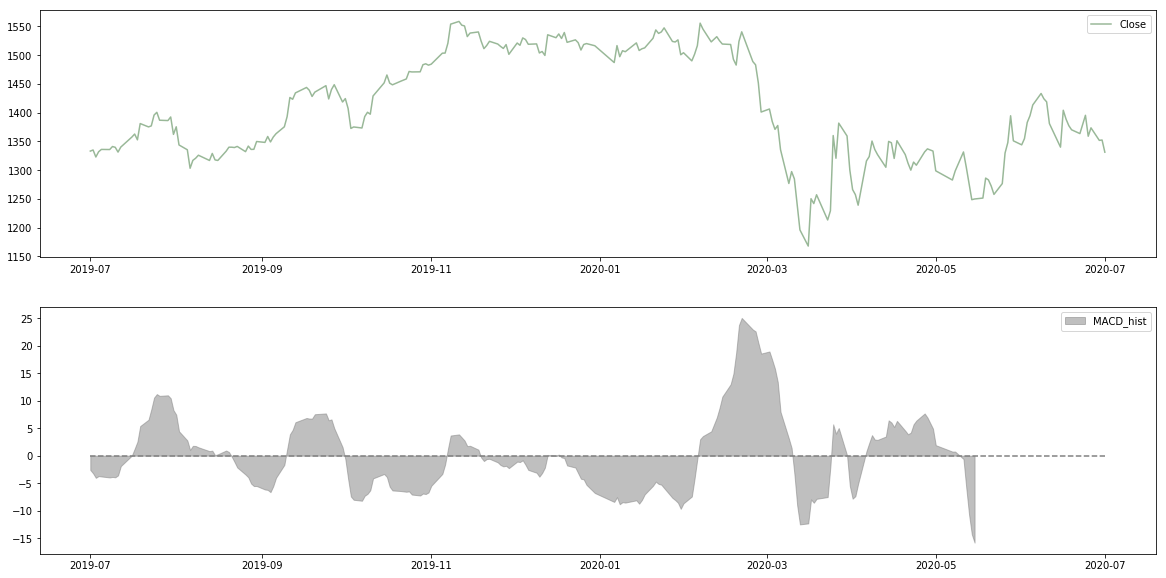

In [34]:
plt.figure(figsize=(20, 10)) # グラフのサイズを指定
plt.subplot(2,1,1)

plt.plot(date, close, label='Close', color='#99b898') # close_dataを使用してグラフを描画
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color='gray', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'gray', linestyles='dashed')
plt.legend()

In [37]:
df['RSI'] = ta.RSI(close, timeperiod=span02)

In [38]:
df.tail()

,Open,High,Low,Close,Volume,SMA01,SMA02,SMA03,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,
2019-07-05,1335.65,1341.67,1332.55,1336.04,17228675,1336.818,1355.0548,1356.3934,-5.904359,-2.116992,-3.787367,43.719010
2019-07-04,1331.00,1335.27,1327.12,1331.97,12432305,1336.934,1355.2952,1354.1554,-6.766413,-3.046876,-3.719537,43.002894
2019-07-03,1323.44,1330.61,1318.20,1322.85,19411330,1333.558,1355.3804,1351.9250,-8.092223,-4.055946,-4.036278,41.419295
2019-07-02,1330.22,1337.01,1324.60,1335.07,21683695,1332.356,1356.1020,1350.1602,-8.063929,-4.857542,-3.206387,44.283076
2019-07-01,1311.99,1333.13,1304.62,1333.13,30141025,1331.812,1357.2964,1348.2944,-8.104623,-5.506958,-2.597664,43.927947


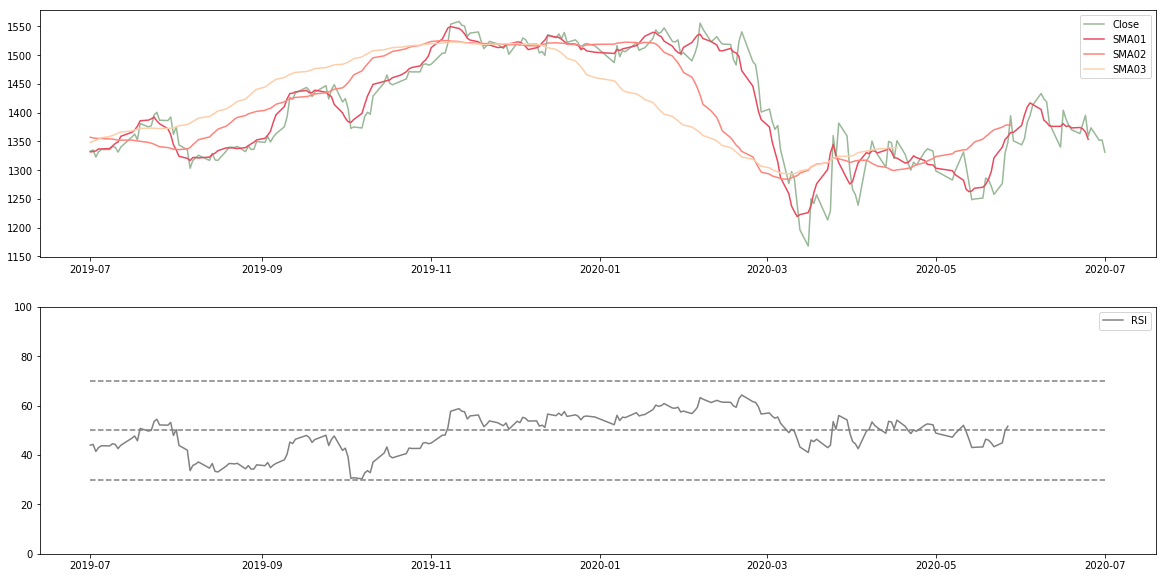

In [41]:
plt.figure(figsize=(20, 10)) # グラフのサイズを指定
plt.subplot(2,1,1)

plt.plot(date, close, label='Close', color='#99b898') # close_dataを使用してグラフを描画
plt.plot(date, df['SMA01'], label='SMA01', color='#e84a5f')  # X軸に日付、Y軸に移動平均線、SMA01を表示
plt.plot(date, df['SMA02'], label='SMA02', color='#ff847c')  # X軸に日付、Y軸に移動平均線、SMA02を表示
plt.plot(date, df['SMA03'], label='SMA03', color='#feceab')  # X軸に日付、Y軸に移動平均線、SMA03を表示
plt.legend()

plt.subplot(2,1,2)
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70], start, end, 'grey', linestyles='dashed')
plt.legend()

In [42]:
df['upper'], df['middle'], df['lower'] = ta.BBANDS(close, timeperiod=span02, nbdevup=2,nbdevdn=2, matype=0)

In [43]:
df.tail()

,Open,High,Low,Close,Volume,SMA01,SMA02,SMA03,macd,macdsignal,macdhist,RSI,upper,middle,lower
Date,,,,,,,,,,,,,,,
2019-07-05,1335.65,1341.67,1332.55,1336.04,17228675,1336.818,1355.0548,1356.3934,-5.904359,-2.116992,-3.787367,43.719010,1408.461155,1355.0548,1301.648445
2019-07-04,1331.00,1335.27,1327.12,1331.97,12432305,1336.934,1355.2952,1354.1554,-6.766413,-3.046876,-3.719537,43.002894,1408.227531,1355.2952,1302.362869
2019-07-03,1323.44,1330.61,1318.20,1322.85,19411330,1333.558,1355.3804,1351.9250,-8.092223,-4.055946,-4.036278,41.419295,1408.096262,1355.3804,1302.664538
2019-07-02,1330.22,1337.01,1324.60,1335.07,21683695,1332.356,1356.1020,1350.1602,-8.063929,-4.857542,-3.206387,44.283076,1407.166281,1356.1020,1305.037719
2019-07-01,1311.99,1333.13,1304.62,1333.13,30141025,1331.812,1357.2964,1348.2944,-8.104623,-5.506958,-2.597664,43.927947,1404.621797,1357.2964,1309.971003


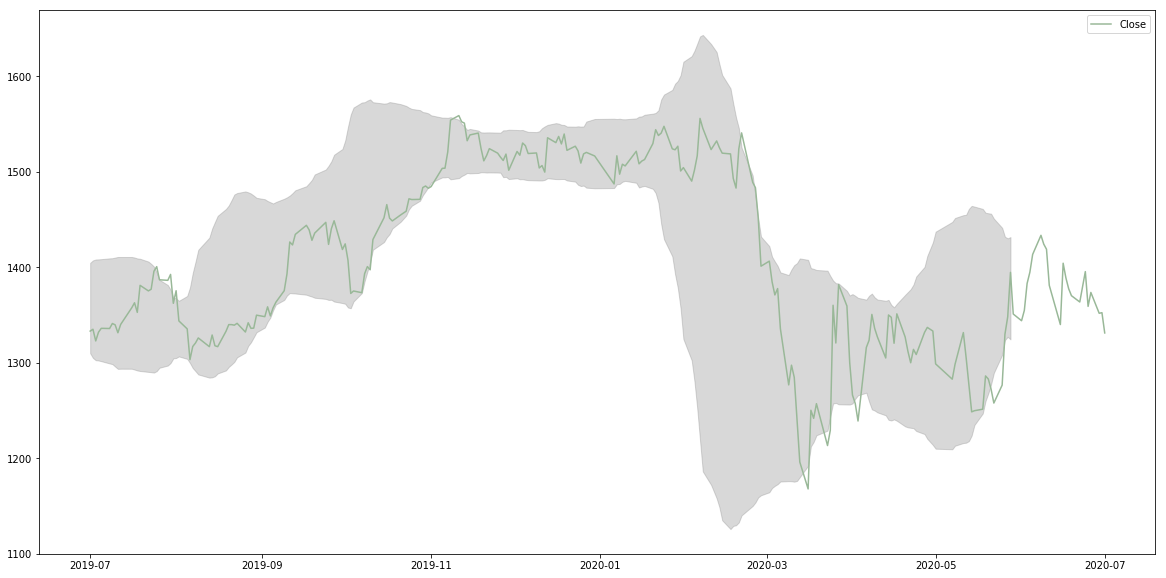

In [44]:
plt.figure(figsize=(20, 10)) # グラフのサイズを指定

plt.plot(date, close, label='Close', color='#99b898') # close_dataを使用してグラフを描画
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()

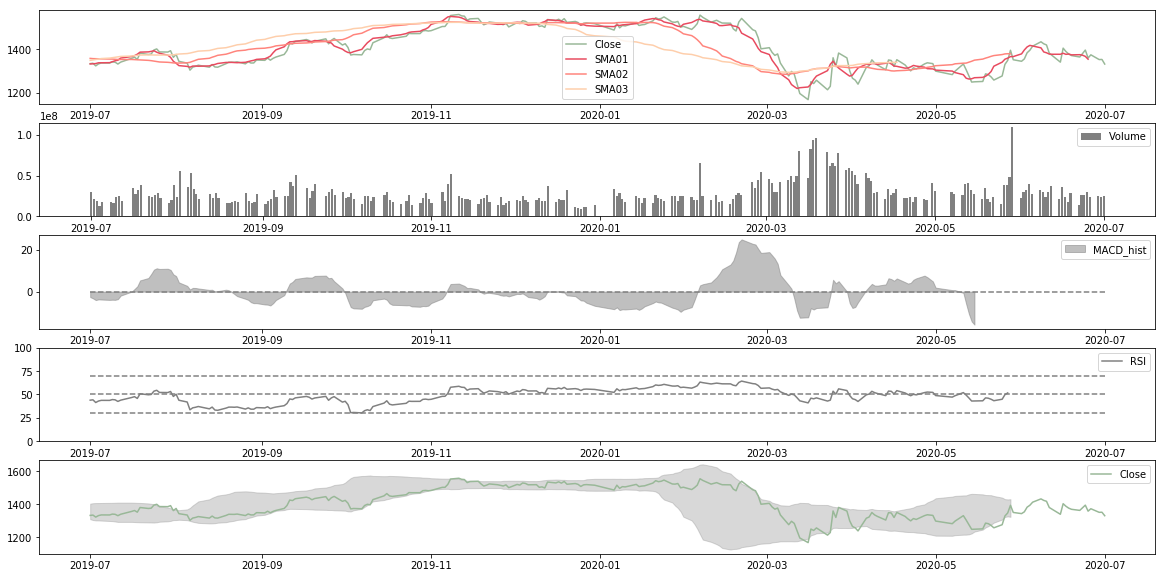

In [45]:
plt.figure(figsize=(20, 10)) # グラフのサイズを指定

# 移動平均
plt.subplot(5, 1, 1)  # 2行1列のグラフの1番目のグラフを表示
plt.plot(date, close, label='Close', color='#99b898')  # X軸に日付、Y軸に株価、Closeを表示
plt.plot(date, df['SMA01'], label='SMA01', color='#e84a5f')  # X軸に日付、Y軸に移動平均線、SMA01を表示
plt.plot(date, df['SMA02'], label='SMA02', color='#ff847c')  # X軸に日付、Y軸に移動平均線、SMA02を表示
plt.plot(date, df['SMA03'], label='SMA03', color='#feceab')  # X軸に日付、Y軸に移動平均線、SMA03を表示
plt.legend()

# 出来高
plt.subplot(5, 1, 2)  # 2行1列のグラフの2番目のグラフを表示
plt.bar(date, df['Volume'], label='Volume', color='gray') # X軸に日付、Y軸に出来高、Volumeを表示
plt.legend()  # 凡例を表示

# MACD
plt.subplot(5, 1, 3) 
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, start, end, 'gray', linestyles='dashed')
plt.legend()

# RSI
plt.subplot(5, 1, 4) 
plt.plot(date, df['RSI'], label='RSI', color='gray')
plt.ylim(0, 100)
plt.hlines([30,50,70], start, end, 'grey', linestyles='dashed')
plt.legend()

# ボリンジャーバンド
plt.subplot(5, 1, 5) 
plt.plot(date, close, label='Close', color='#99b898') # close_dataを使用してグラフを描画
plt.fill_between(date, df['upper'], df['lower'], color='gray', alpha=0.3)
plt.legend()